In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date']) 
df['job_skills'] = df['job_skills'].apply(lambda skills : ast.literal_eval(skills) if pd.notna(skills) else skills)
df.head(3) 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."


In [2]:
df_DA_pivot = df[df['job_title_short']=='Data Analyst'].copy()
df_DA_pivot = df_DA_pivot.explode('job_skills')
# df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_date'].dt.strftime('%b')
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_date'].dt.month
df_pivot = df_DA_pivot.pivot_table(index='job_posted_month',columns='job_skills', aggfunc='size', fill_value=0)
df_pivot.loc['Total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot = df_pivot.drop('Total')
# df_pivot.loc['Total'].sort_values(ascending=False).index

df_pivot = df_pivot.reset_index()

df_pivot['job_posted_month'] = df_pivot['job_posted_month'].apply(lambda x : pd.to_datetime(x, format='%m').strftime('%b'))
df_pivot = df_pivot.set_index('job_posted_month')

Text(0, 0.5, 'Counts')

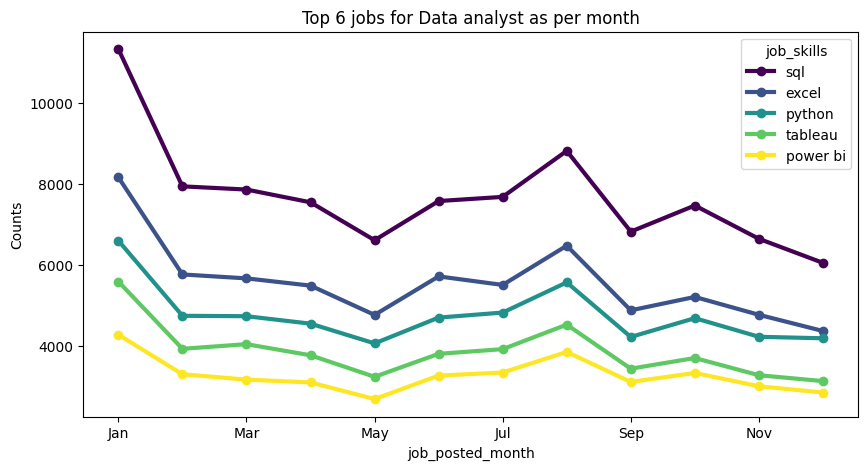

In [3]:
# Get the top 5 Skills 
df_pivot.iloc[:,0:5].plot(
    kind='line',
    linewidth=3,
    linestyle='-',
    # colormap='cividis',
    colormap='viridis',
    marker='o', #option o ,x ,+,*
    markersize=6,
    figsize=(10,5)
    )
plt.title('Top 6 jobs for Data analyst as per month')
plt.ylabel('Counts')

In [12]:
skills_counts=20

df_scatter_pivot =  df[df['job_title_short']=='Data Analyst']
df_scatter_pivot = df_scatter_pivot.explode('job_skills')
df_scatter_pivot = df_scatter_pivot.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median = ('salary_year_avg','median')
).sort_values(by='skill_count',ascending=False).head(skills_counts)

df_scatter_pivot

,skill_count,median
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


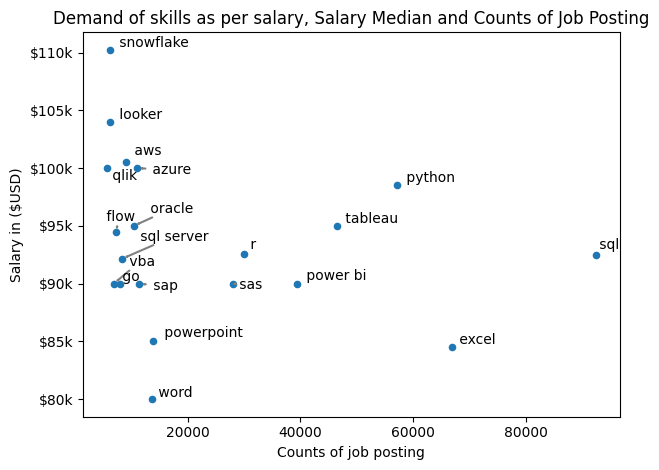

In [30]:
from adjustText import adjust_text

df_scatter_pivot.plot(kind='scatter',x='skill_count',y='median')
text = []

for i , txt  in enumerate(df_scatter_pivot.index):
    (df_scatter_pivot['skill_count'].iloc[i], df_scatter_pivot['median'].iloc[i], f' {txt}')
    text.append(plt.text(df_scatter_pivot['skill_count'].iloc[i], df_scatter_pivot['median'].iloc[i], f' {txt}'))

adjust_text(text,arrowprops=dict(arrowstyle='->',color='grey', lw=1.5))
ax =plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos : f'${int(y/1000)}k' ))

plt.title('Demand of skills as per salary, Salary Median and Counts of Job Posting')
plt.xlabel('Counts of job posting')
plt.ylabel('Salary in ($USD)')
plt.tight_layout()
plt.show()
# df_scatter_pivot